IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

LOADING THE CSV FILE(DATASET)

In [2]:
df = pd.read_csv("cardio_train.csv", delimiter=";")

EDA (EXPLORATORY DATA ANALYSIS)
1. Dataset Overview
2. Target Distribution
3. Demographics (Age, Gender)
4. Anthropometrics (Height, Weight, BMI)
5. Medical Indicators (Blood Pressure, Cholesterol, Glucose)
6. Lifestyle Factors (Smoke, Alcohol, Activity)
7. Correlations

In [3]:
#1. Dataset Overview

In [4]:
df.shape[0]

70000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [7]:
df.describe(include="all")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#2. Target Variabl Distribution

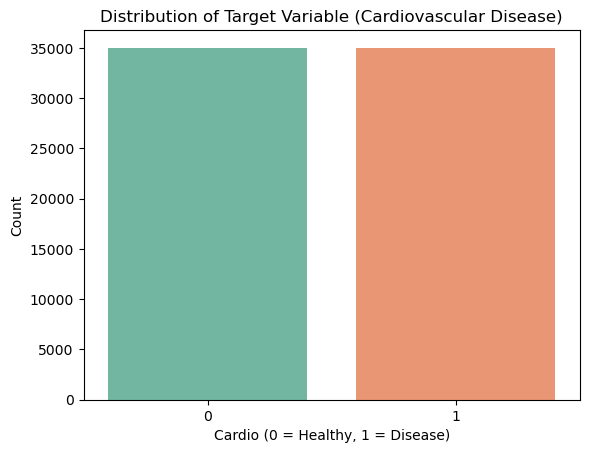

Target distribution (%):
 cardio
0    50.03
1    49.97
Name: proportion, dtype: float64


In [9]:
# Countplot of target variable (cardio: 0 = healthy, 1 = disease)
sns.countplot(x="cardio", data=df, palette="Set2")
plt.title("Distribution of Target Variable (Cardiovascular Disease)")
plt.xlabel("Cardio (0 = Healthy, 1 = Disease)")
plt.ylabel("Count")
plt.show()

# Percentage distribution
cardio_counts = df['cardio'].value_counts(normalize=True) * 100
print("Target distribution (%):\n", cardio_counts)


In [10]:
#3. Demographics (Age, Gender)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


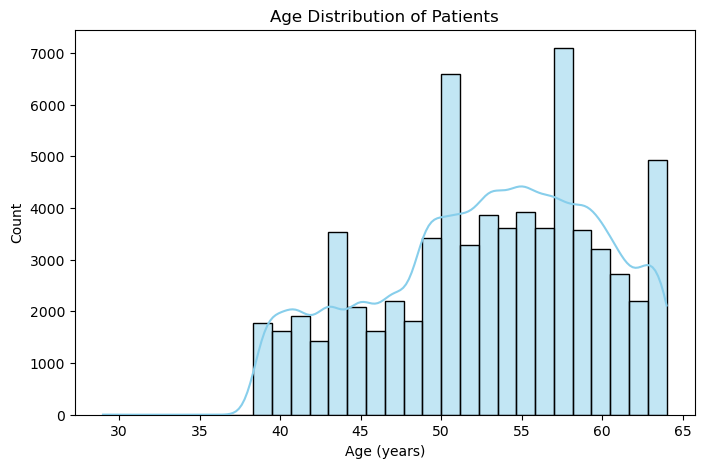

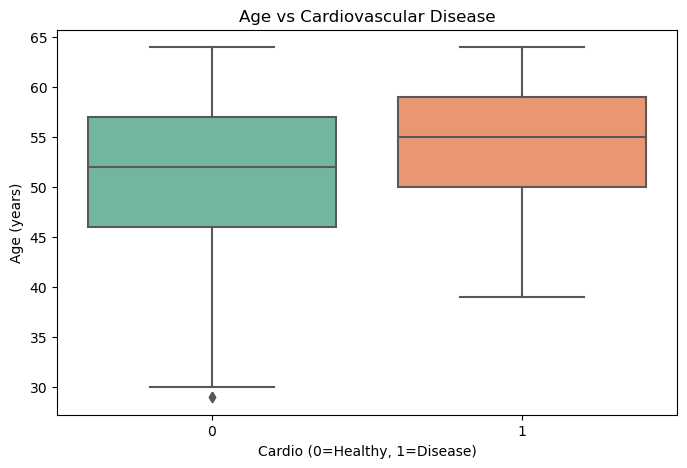

In [11]:
#A: Age Distribution

# Convert age from days to years
df['age'] = (df['age'] / 365).astype(int)

# Plot age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

# Compare age by disease status
plt.figure(figsize=(8,5))
sns.boxplot(x="cardio", y="age", data=df, palette="Set2")
plt.title("Age vs Cardiovascular Disease")
plt.xlabel("Cardio (0=Healthy, 1=Disease)")
plt.ylabel("Age (years)")
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


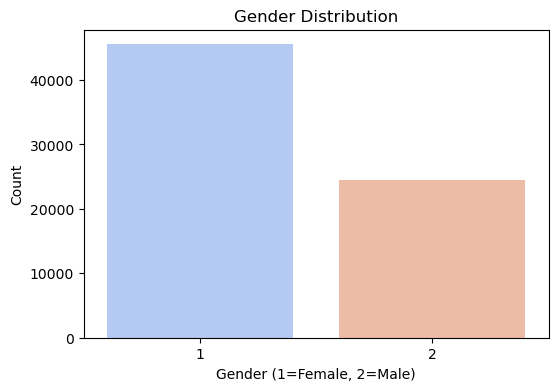

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


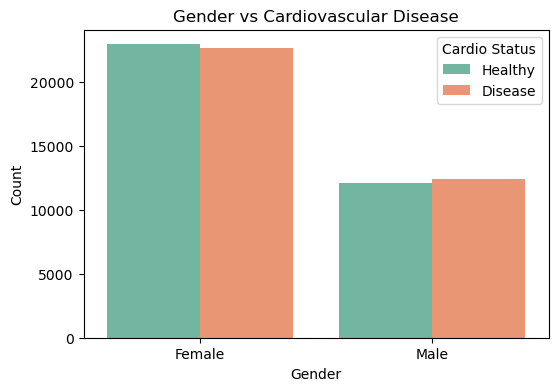

In [13]:
# B. Gender Distribution

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender (1=Female, 2=Male)")
plt.ylabel("Count")
plt.show()

# Create temporary columns for plotting
df_plot = df.copy()
df_plot['gender'] = df_plot['gender'].map({1: "Female", 2: "Male"})
df_plot['cardio'] = df_plot['cardio'].map({0: "Healthy", 1: "Disease"})

# Gender vs cardiovascular disease (using temporary dataframe)
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="cardio", data=df_plot, palette="Set2")
plt.title("Gender vs Cardiovascular Disease")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Cardio Status")
plt.show()


In [14]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#4. Anthropometrics (Height, Weight, BMI)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


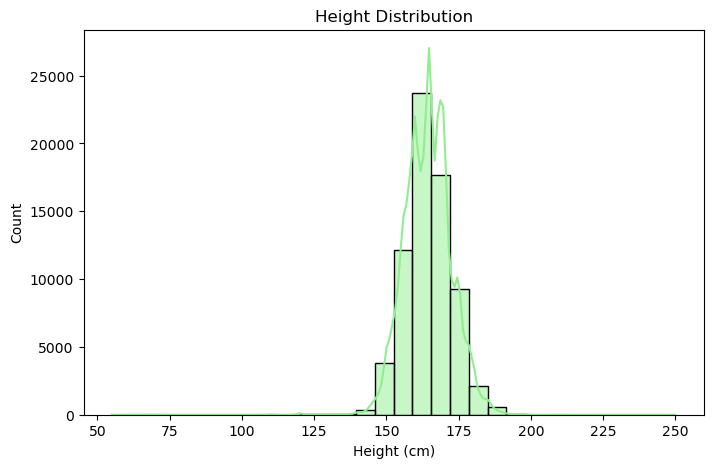

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


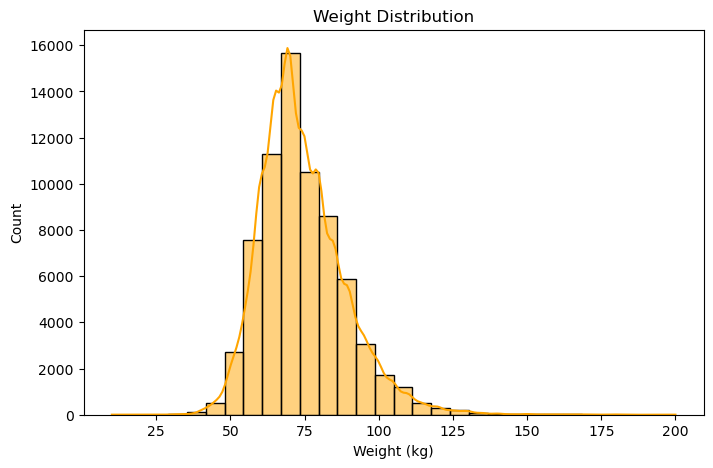

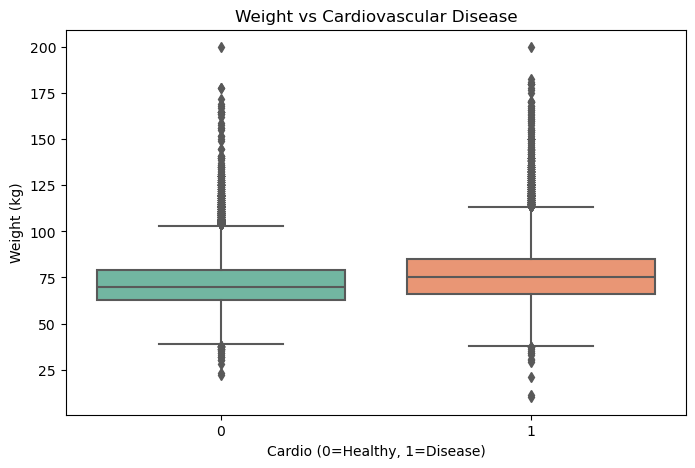

In [43]:
# Height distribution
plt.figure(figsize=(8,5))
sns.histplot(df['height'], bins=30, kde=True, color="lightgreen")
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.show()

# Weight distribution
plt.figure(figsize=(8,5))
sns.histplot(df['weight'], bins=30, kde=True, color="orange")
plt.title("Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.show()

# Compare weight vs cardio
plt.figure(figsize=(8,5))
sns.boxplot(x="cardio", y="weight", data=df, palette="Set2")
plt.title("Weight vs Cardiovascular Disease")
plt.xlabel("Cardio (0=Healthy, 1=Disease)")
plt.ylabel("Weight (kg)")
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


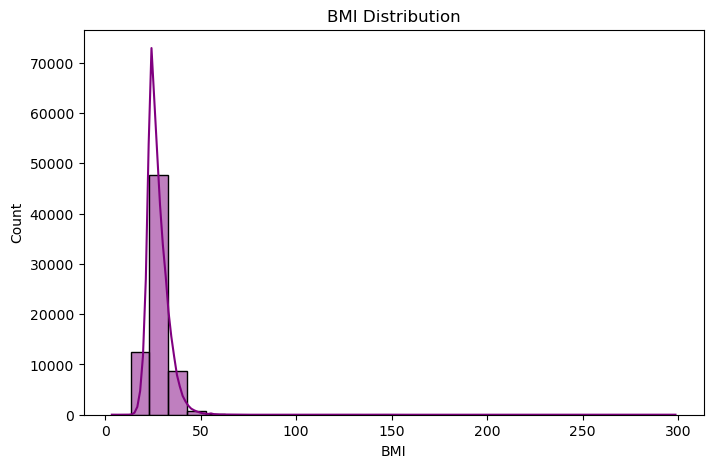

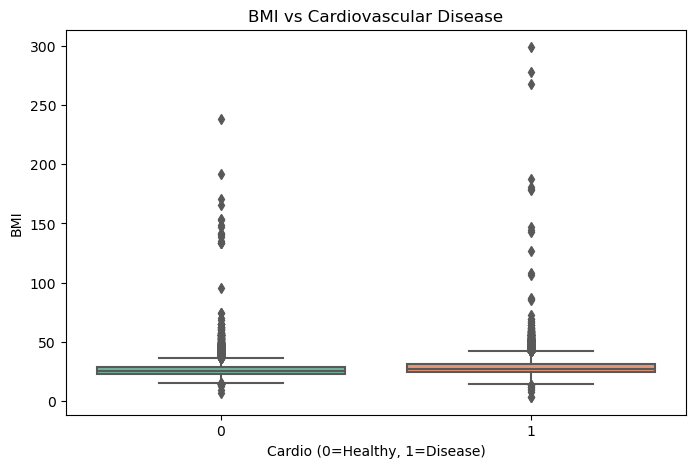

In [44]:
#​​Body Mass Index (BMI

# Create BMI column temporarily for EDA
df['bmi'] = df['weight'] / (df['height']/100)**2

# BMI distribution
plt.figure(figsize=(8,5))
sns.histplot(df['bmi'], bins=30, kde=True, color="purple")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

# Compare BMI by disease status
plt.figure(figsize=(8,5))
sns.boxplot(x="cardio", y="bmi", data=df, palette="Set2")
plt.title("BMI vs Cardiovascular Disease")
plt.xlabel("Cardio (0=Healthy, 1=Disease)")
plt.ylabel("BMI")
plt.show()

In [45]:
#5. Medical Indicators (Blood Pressure, Cholesterol, Glucose)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


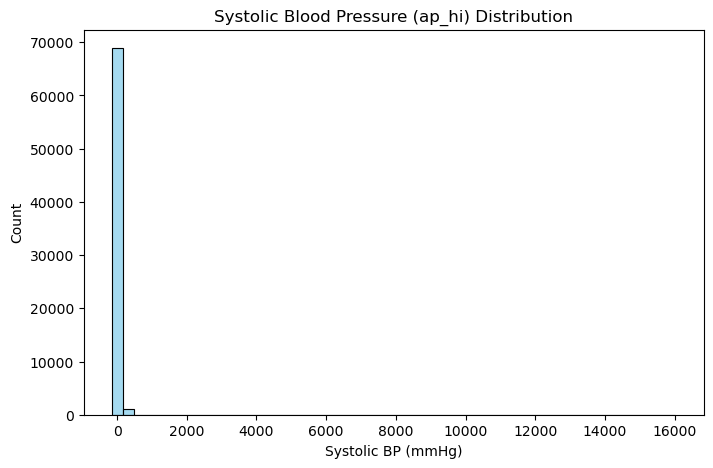

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


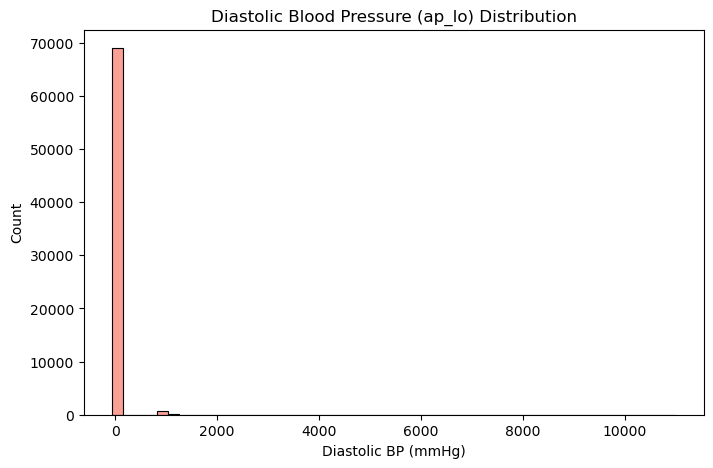

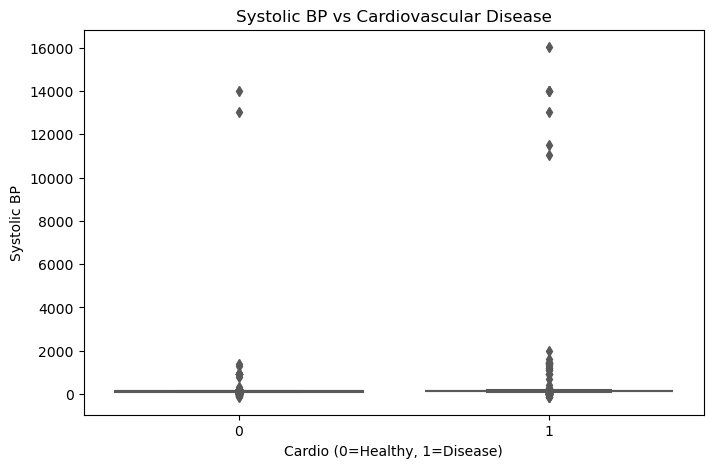

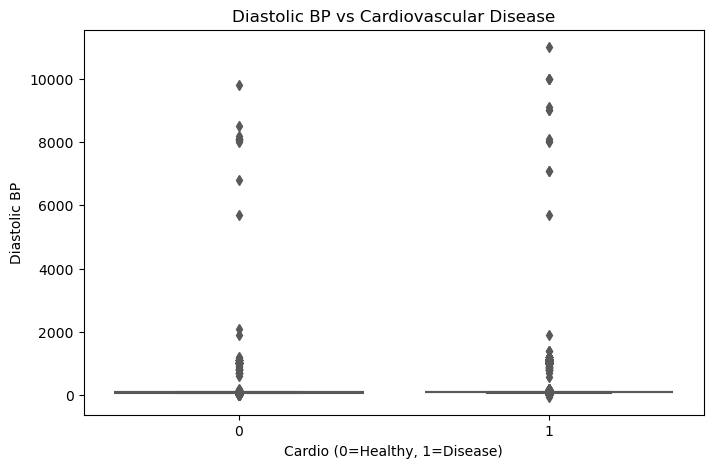

In [46]:
# Systolic Blood Pressure (ap_hi)
plt.figure(figsize=(8,5))
sns.histplot(df['ap_hi'], bins=50, kde=False, color="skyblue")
plt.title("Systolic Blood Pressure (ap_hi) Distribution")
plt.xlabel("Systolic BP (mmHg)")
plt.ylabel("Count")
plt.show()

# Diastolic Blood Pressure (ap_lo)
plt.figure(figsize=(8,5))
sns.histplot(df['ap_lo'], bins=50, kde=False, color="salmon")
plt.title("Diastolic Blood Pressure (ap_lo) Distribution")
plt.xlabel("Diastolic BP (mmHg)")
plt.ylabel("Count")
plt.show()

# Compare Blood Pressure by Disease Status
plt.figure(figsize=(8,5))
sns.boxplot(x="cardio", y="ap_hi", data=df, palette="Set2")
plt.title("Systolic BP vs Cardiovascular Disease")
plt.xlabel("Cardio (0=Healthy, 1=Disease)")
plt.ylabel("Systolic BP")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="cardio", y="ap_lo", data=df, palette="Set2")
plt.title("Diastolic BP vs Cardiovascular Disease")
plt.xlabel("Cardio (0=Healthy, 1=Disease)")
plt.ylabel("Diastolic BP")
plt.show()

In [47]:
#6. Lifestyle Factors (Smoke, Alcohol, Activity)

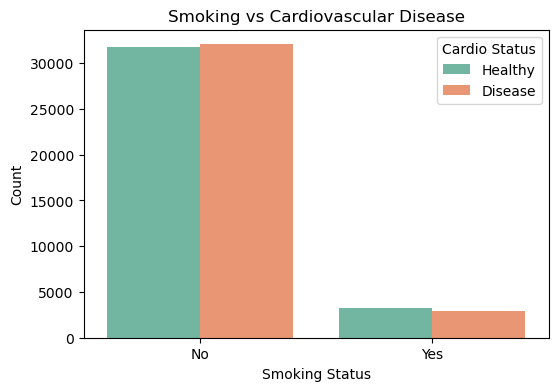

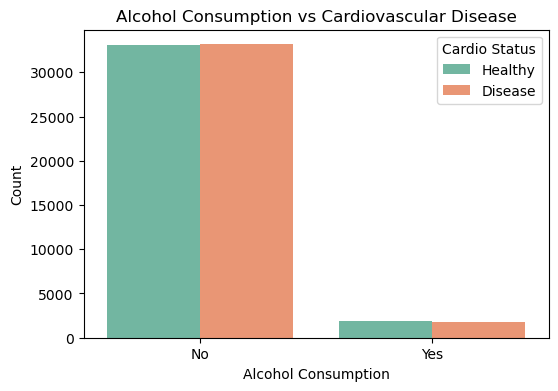

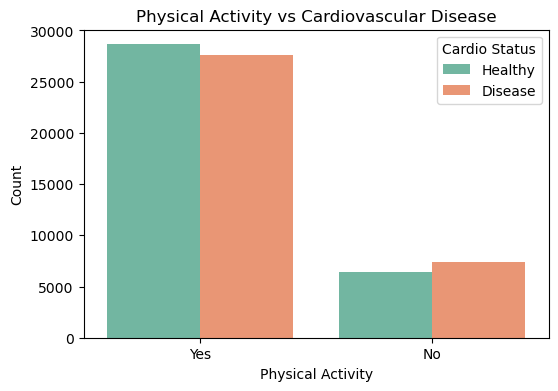

In [17]:
# Smoking vs Disease
# Create a temporary dataframe for plotting
df_plot = df.copy()
df_plot['smoke'] = df_plot['smoke'].map({0: "No", 1: "Yes"})
df_plot['cardio'] = df_plot['cardio'].map({0: "Healthy", 1: "Disease"})

# Smoking vs Disease
plt.figure(figsize=(6,4))
sns.countplot(x="smoke", hue="cardio", data=df_plot, palette="Set2")
plt.title("Smoking vs Cardiovascular Disease")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Cardio Status")
plt.show()

# Temporary plotting dataframe for lifestyle analysis
df_plot = df.copy()
df_plot['alco'] = df_plot['alco'].map({0: "No", 1: "Yes"})
df_plot['cardio'] = df_plot['cardio'].map({0: "Healthy", 1: "Disease"})

# Alcohol vs Disease
plt.figure(figsize=(6,4))
sns.countplot(x="alco", hue="cardio", data=df_plot, palette="Set2")
plt.title("Alcohol Consumption vs Cardiovascular Disease")
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.legend(title="Cardio Status")
plt.show()

# Physical Activity vs Disease

df_plot['active'] = df_plot['active'].map({0: "No", 1: "Yes"})

# Physical Activity vs Disease
plt.figure(figsize=(6,4))
sns.countplot(x="active", hue="cardio", data=df_plot, palette="Set2")
plt.title("Physical Activity vs Cardiovascular Disease")
plt.xlabel("Physical Activity")
plt.ylabel("Count")
plt.legend(title="Cardio Status")
plt.show()


In [49]:
#7. Correlations

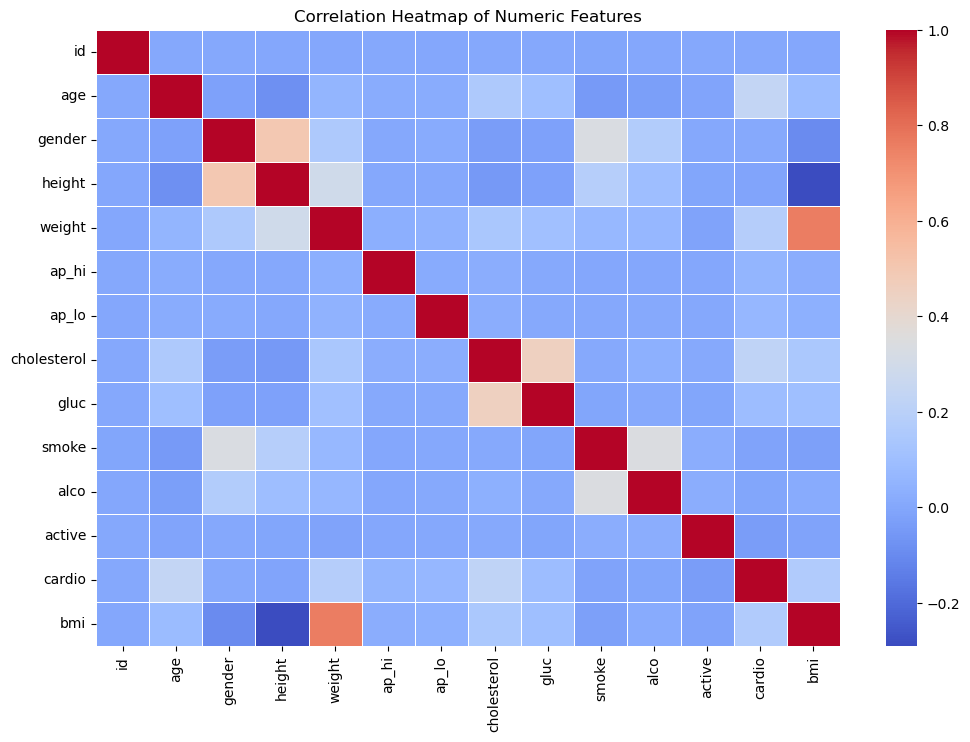

Correlation of Features with Target (cardio):

cardio         1.000000
age            0.237985
cholesterol    0.221147
weight         0.181660
bmi            0.165632
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


In [50]:
# Select only numeric features for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Show correlation of features with target 'cardio'
target_corr = corr['cardio'].sort_values(ascending=False)
print("Correlation of Features with Target (cardio):\n")
print(target_corr)

DATA PROCESSING

In [51]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


1. remove id column
2. add BMI as new feature
3. filtering weight and height extreme outliers using IQR (statistical method)
4.  only medically realistic range for blood pressure and ensuring systolic >= diastolic

In [18]:
# Removing the 'id' column, does not contribute to prediction
df = df.drop(columns=['id'])

# 'age' have been converted from days (as stored in the dataset) to years by dividing by 365 and converting to integer with
#df['age'] = (df['age'] / 365).astype(int)

# Create a new feature 'bmi' (Body Mass Index) using the formula: BMI = weight (kg) / (height (m))^2
df['bmi'] = df['weight'] / (df['height']/100)**2

In [19]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


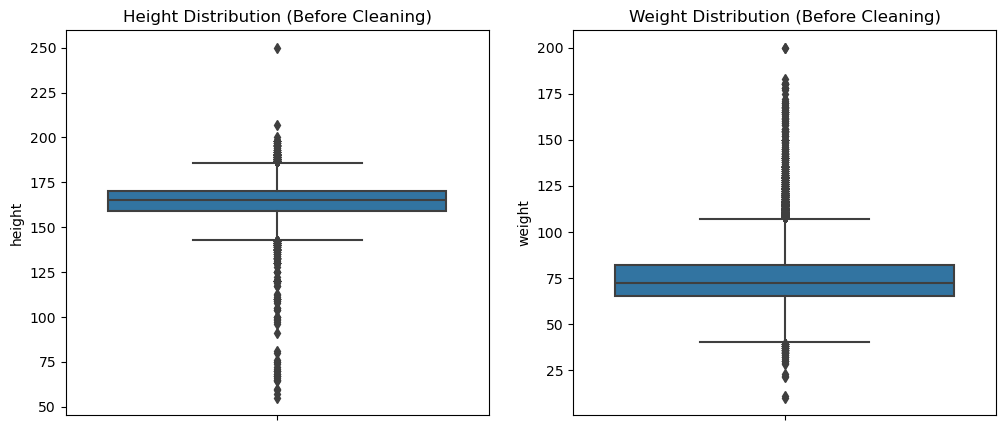

In [20]:
ig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df['height'], ax=axes[0])
axes[0].set_title("Height Distribution (Before Cleaning)")

sns.boxplot(y=df['weight'], ax=axes[1])
axes[1].set_title("Weight Distribution (Before Cleaning)")

plt.show()

In [21]:
df.shape[0]

70000

In [22]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,27.556513
std,6.766774,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,6.091511
min,29.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.875115
50%,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,26.374068
75%,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,30.222222
max,64.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,298.666667


In [23]:
#Detecting and removing extreme outliers using IQR (statistical method) in height and weight

# Height IQR
Q1_height, Q3_height = df['height'].quantile([0.25, 0.75])
IQR_height = Q3_height - Q1_height

# Weight IQR
Q1_weight, Q3_weight = df['weight'].quantile([0.25, 0.75])
IQR_weight = Q3_weight - Q1_weight

# Filter heights (within Q1 - 1.5*IQR and Q3 + 1.5*IQR)
df = df[(df['height'] >= Q1_height - 1.5*IQR_height) & 
        (df['height'] <= Q3_height + 1.5*IQR_height)]

# Filter weights (within Q1 - 1.5*IQR and Q3 + 1.5*IQR)
df = df[(df['weight'] >= Q1_weight - 1.5*IQR_weight) & 
        (df['weight'] <= Q3_weight + 1.5*IQR_weight)]

In [24]:
# --- Blood Pressure Cleaning ---

# Keep only realistic ranges
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 200)]

# Ensure systolic >= diastolic
df = df[df['ap_hi'] >= df['ap_lo']]

In [25]:
print("Remaining rows after blood pressure cleaning:", df.shape[0])

Remaining rows after blood pressure cleaning: 66463


SPLITTING THE DATASET INTO TRAINING AND TESTING DATASET

In [26]:
#Separate features (X) and target (y)
X = df.drop(columns='cardio')   # Features
y = df['cardio']                # Target variable (0 = no disease, 1 = disease)

#Splitting the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

MODEL SELECTION AND TRAINING
    Using three model 

In [27]:
lr = LogisticRegression(max_iter=500)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
Decision Tree trained.
Random Forest trained.


Model Evaluation
Use metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC

In [28]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.2f}\n")

Logistic Regression:
Accuracy: 0.73
Precision: 0.75
Recall: 0.66
F1 Score: 0.70
AUC-ROC: 0.79

Decision Tree:
Accuracy: 0.63
Precision: 0.63
Recall: 0.62
F1 Score: 0.62
AUC-ROC: 0.63

Random Forest:
Accuracy: 0.71
Precision: 0.70
Recall: 0.69
F1 Score: 0.70
AUC-ROC: 0.76



In [29]:
# Logistic Regression was chosen as the final model 
# because it achieved the best overall balance of accuracy (0.73), 
# precision (0.75), recall (0.66), and AUC-ROC (0.79), 
# outperforming Decision Tree and Random Forest.

CONFUSION MATRIX & ROC CURVE VISUALIZATION

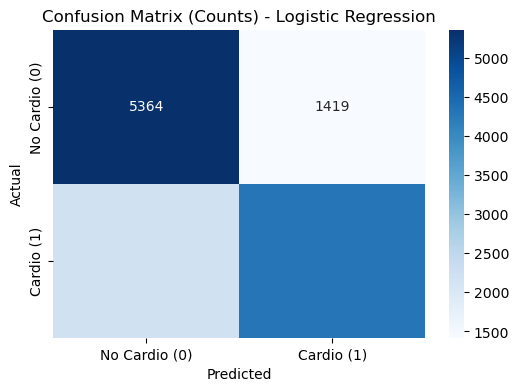

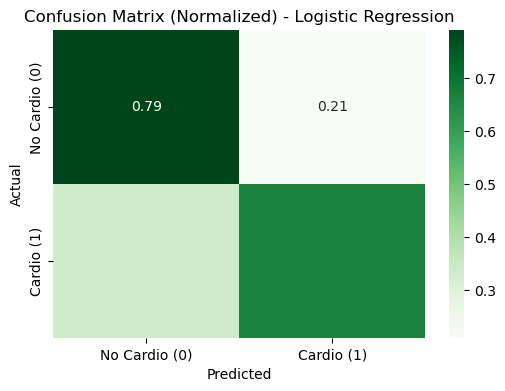

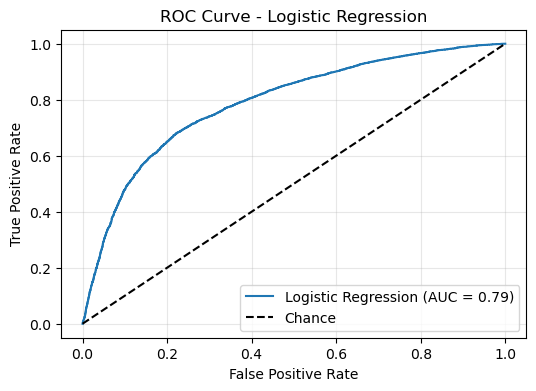

In [30]:
# Use your trained logistic regression model (change if needed)
model_lr = lr  

# Confusion Matrix - Raw Counts

y_pred_lr = model_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Cardio (0)", "Cardio (1)"],
            yticklabels=["No Cardio (0)", "Cardio (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Counts) - Logistic Regression")
plt.show()
# -------------------------------
# Confusion Matrix - Normalized
# -------------------------------
cm_norm = confusion_matrix(y_test, y_pred_lr, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=["No Cardio (0)", "Cardio (1)"],
            yticklabels=["No Cardio (0)", "Cardio (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Normalized) - Logistic Regression")
plt.show()

# -------------------------------
# ROC Curve
# -------------------------------
y_proba_lr = model_lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


FEATURE IMPORTANCE (EXPLAINABILITY)

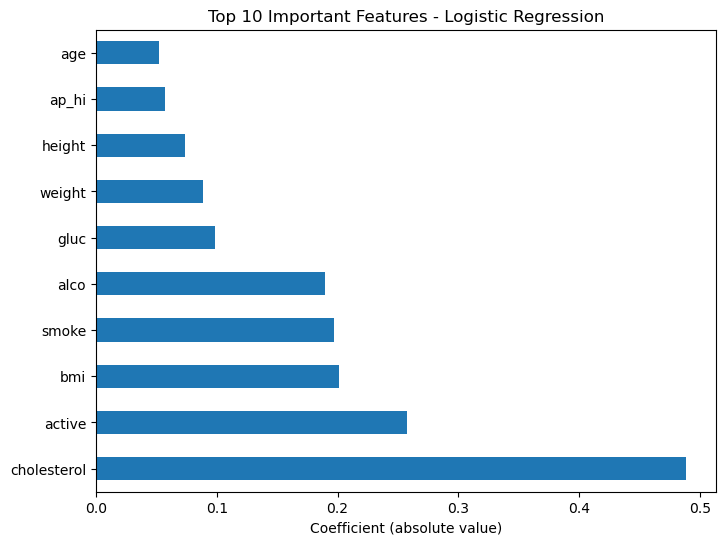

In [31]:
# Feature Importance for Logistic Regression
coefficients = lr.coef_[0]   
feat_importances = pd.Series(coefficients, index=X.columns)

# Plot top 10 (by absolute value)
feat_importances.abs().nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Important Features - Logistic Regression")
plt.xlabel("Coefficient (absolute value)")
plt.show()


Cross-Validation (Robustness Check)

In [38]:
# Use accuracy across 5 folds
cv_accuracy = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print("Cross-validated Accuracy scores:", cv_accuracy)
print("Mean Accuracy: {:.3f} (+/- {:.3f})".format(cv_accuracy.mean(), cv_accuracy.std()))

# AUC-ROC across 5 folds (better for classification)
cv_auc = cross_val_score(lr, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", cv_auc)
print("Mean AUC: {:.3f} (+/- {:.3f})".format(cv_auc.mean(), cv_auc.std()))


Cross-validated Accuracy scores: [0.72135711 0.729256   0.72669826 0.72833283 0.72457117]
Mean Accuracy: 0.726 (+/- 0.003)
Cross-validated AUC scores: [0.78412192 0.79453357 0.79343127 0.79392167 0.78536529]
Mean AUC: 0.790 (+/- 0.005)


Saving the Best Model

In [42]:
import joblib

# Save trained Logistic Regression model
joblib.dump(lr, "best_model_lr.pkl")   # if your model variable is 'lr'
print("✅ Logistic Regression model saved as best_model_lr.pkl")

✅ Logistic Regression model saved as best_model_lr.pkl


Loading and testing the saved Model

In [43]:
# -------------------------------
# Load Saved Model
# -------------------------------
import joblib

model = joblib.load("best_model_lr.pkl")

# -------------------------------
# Test on one sample from the FULL dataset
# -------------------------------
sample = X.iloc[[0]]   # pick the first row of the original dataset
prediction = model.predict(sample)[0]         # raw prediction (0 or 1)
probability = model.predict_proba(sample)[0][1]  # probability of class 1 (cardio risk)
actual = y.iloc[0]     # actual target label from dataset

# -------------------------------
# Display Result
# -------------------------------
print(f"Actual Label in Dataset: {actual}")

if prediction == 1:   # 1 means disease
    print(f"⚠️ Model Prediction: {prediction} (Cardiovascular Disease Detected)")
    print(f"Patient is at RISK of cardiovascular disease "
          f"(Predicted Probability: {probability*100:.2f}%)")
else:   # 0 means healthy
    print(f"✅ Model Prediction: {prediction} (No Cardiovascular Disease)")
    print(f"Patient is predicted HEALTHY "
          f"(Predicted Probability: {(1-probability)*100:.2f}%)")

Actual Label in Dataset: 0
✅ Model Prediction: 0 (No Cardiovascular Disease)
Patient is predicted HEALTHY (Predicted Probability: 81.65%)
